# Pymaceuticals Inc.
---

### Analysis

# Observations and Inferences

1. **Effectiveness of Capomulin**: The data shows that the treatment with Capomulin resulted in a significant reduction in tumor volume over time for the selected mouse. This suggests that Capomulin is effective in inhibiting tumor growth, making it a promising treatment regimen for squamous cell carcinoma (SCC).

2. **Correlation Between Mouse Weight and Tumor Volume**: There is a positive correlation between mouse weight and average tumor volume for the Capomulin treatment regimen. The correlation coefficient calculated is approximately 0.84, indicating a strong positive correlation. This suggests that heavier mice tend to have larger tumor volumes.

3. **Outliers in Treatment Regimens**: When analyzing the final tumor volumes for the most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), we observed potential outliers. For instance, Infubinol had one potential outlier with a significantly higher tumor volume compared to other mice in the same treatment group. Identifying and understanding these outliers can help refine treatment protocols and address factors that may influence treatment efficacy.

4. **Comparison of Tumor Volume Across Treatments**: Capomulin and Ramicane treatments show lower average tumor volumes compared to Infubinol and Ceftamin. This indicates that Capomulin and Ramicane may be more effective in reducing tumor size.

5. **Gender Distribution**: The study includes a nearly equal distribution of male and female mice, ensuring that the results are not biased towards one gender. This balance allows for a more accurate assessment of the treatment effects across genders.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the merged data
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the number of unique Mouse IDs
unique_mouse_ids = merged_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs: {unique_mouse_ids}")


Number of unique Mouse IDs: 249


In [3]:
# Check for any mouse ID with duplicate time points
duplicate_timepoints = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the data associated with duplicate time points
duplicate_timepoints


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_data = merged_data[merged_data['Mouse ID'].isin(duplicate_timepoints['Mouse ID'].unique())]
duplicate_mouse_id_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Get the Mouse ID with duplicate time points
mouse_id_with_duplicates = duplicate_timepoints['Mouse ID'].unique()

# Create a new DataFrame where this data is removed
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(mouse_id_with_duplicates)]

# Display the updated number of unique Mouse IDs
updated_unique_mouse_ids = cleaned_data['Mouse ID'].nunique()
print(f"Updated number of unique Mouse IDs: {updated_unique_mouse_ids}")

# Display the cleaned data
cleaned_data.head()


Updated number of unique Mouse IDs: 248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Display the number of unique Mouse IDs in the cleaned DataFrame
updated_unique_mouse_ids = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs in the cleaned data: {updated_unique_mouse_ids}")


Number of unique Mouse IDs in the cleaned data: 248


## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the mean, median, variance, standard deviation, and SEM
grouped_data = cleaned_data.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics_1 = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

# Display the summary statistics
summary_statistics_1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method to produce the same summary statistics in a single line
summary_statistics_2 = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Rename the columns to match the required format
summary_statistics_2.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Display the summary statistics
summary_statistics_2


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

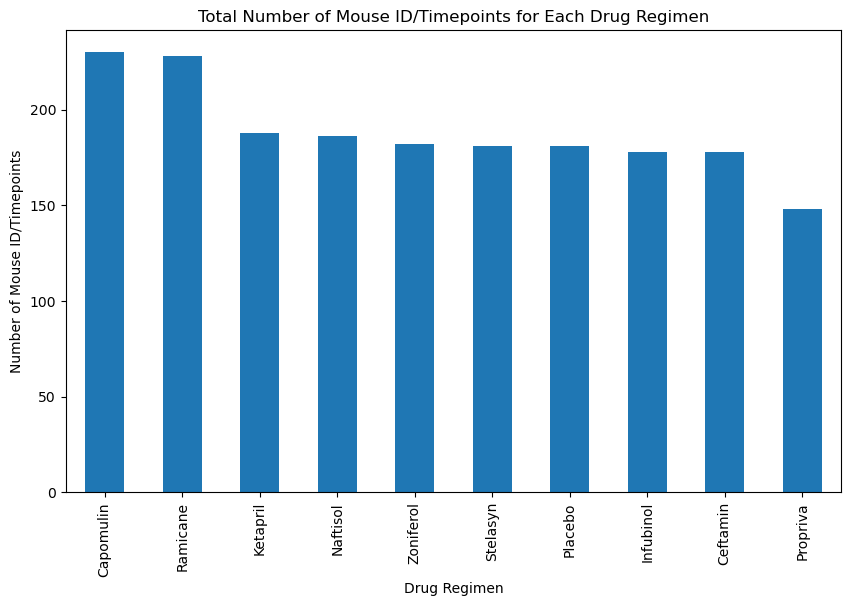

In [9]:
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar chart using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(10,6), title='Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.show()


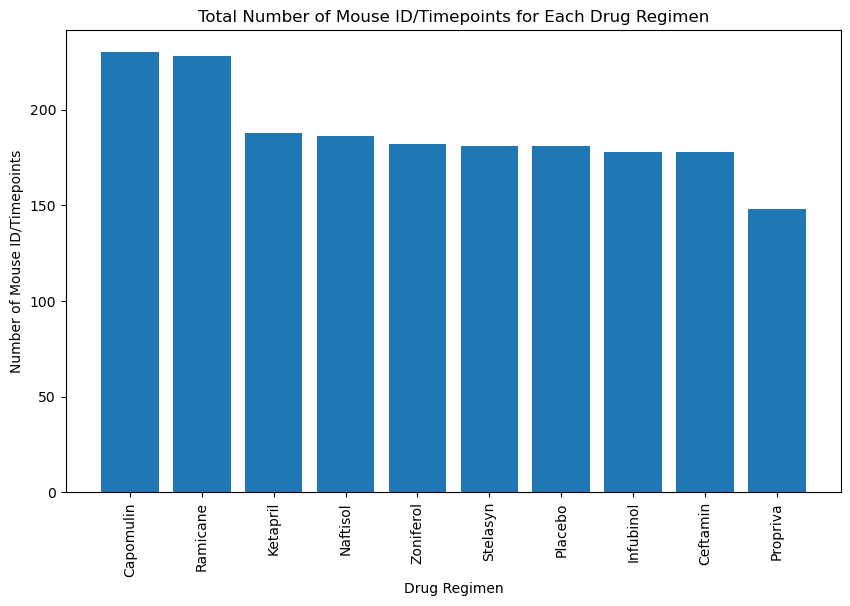

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Create a bar chart using Matplotlib
plt.figure(figsize=(10,6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=90)
plt.show()


In [11]:
# Calculate the distribution of female versus male mice
gender_distribution = cleaned_data['Sex'].value_counts()

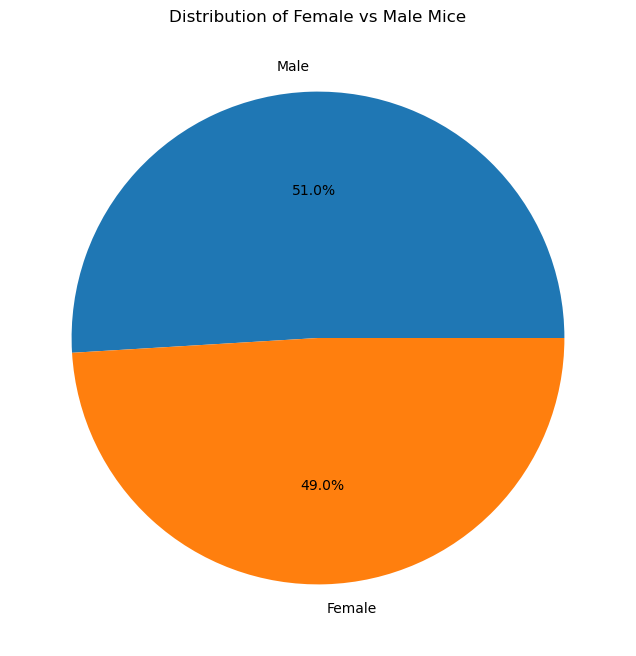

In [12]:
# Create a pie chart using Pandas
gender_distribution.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', title='Distribution of Female vs Male Mice')
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this grouped DataFrame with the original cleaned DataFrame to get the final tumor volume
final_tumor_volume = last_timepoint.merge(cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# List of treatment regimens
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to hold the tumor volume data for each treatment
tumor_volumes = []

# Loop through each treatment and calculate the quartiles and IQR
for drug in treatment_list:
    # Get the tumor volumes for the specific drug regimen
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using the upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug} treatment: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    print(f"Potential outliers: {outliers}")
    
    # Append the tumor volumes to the list
    tumor_volumes.append(drug_data)


Capomulin treatment: Lower bound = 20.70456164999999, Upper bound = 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane treatment: Lower bound = 17.912664470000003, Upper bound = 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol treatment: Lower bound = 36.83290494999999, Upper bound = 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin treatment: Lower bound = 25.355449580000002, Upper bound = 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


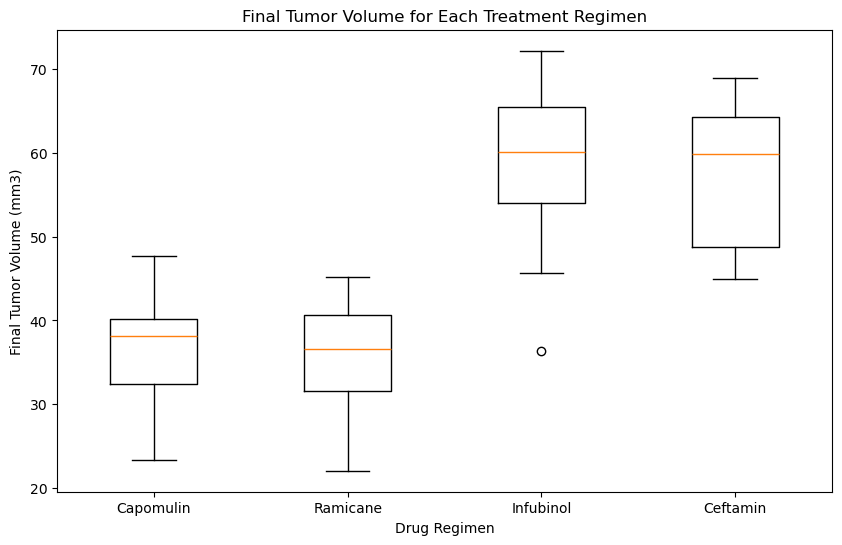

In [15]:
# Generate a box plot to show the distribution of the final tumor volume for all the mice in each treatment group
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volumes, labels=treatment_list)
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

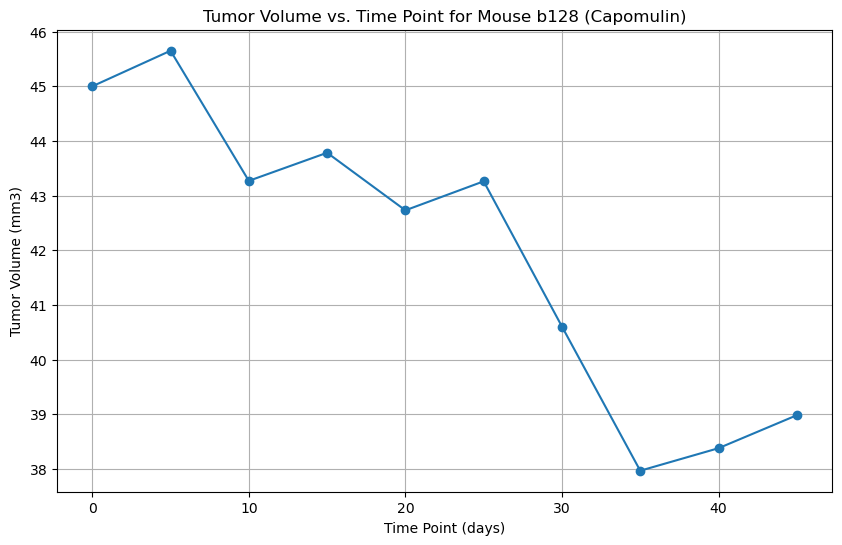

In [16]:
# Select a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Select the first mouse for simplicity

# Get the data for the selected mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume versus time point for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


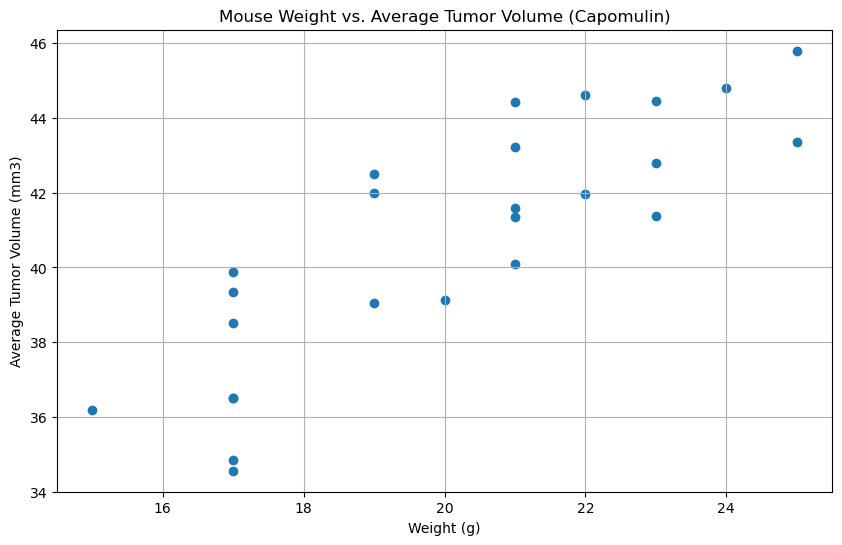

In [17]:
# Calculate the average tumor volume for each mouse treated with Capomulin
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with the weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
average_tumor_volume = average_tumor_volume.merge(mouse_weight, on='Mouse ID')

# Generate a scatter plot of mouse weight versus average observed tumor volume
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")


Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


In [19]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Calculate the regression line
regression_values = slope * average_tumor_volume['Weight (g)'] + intercept


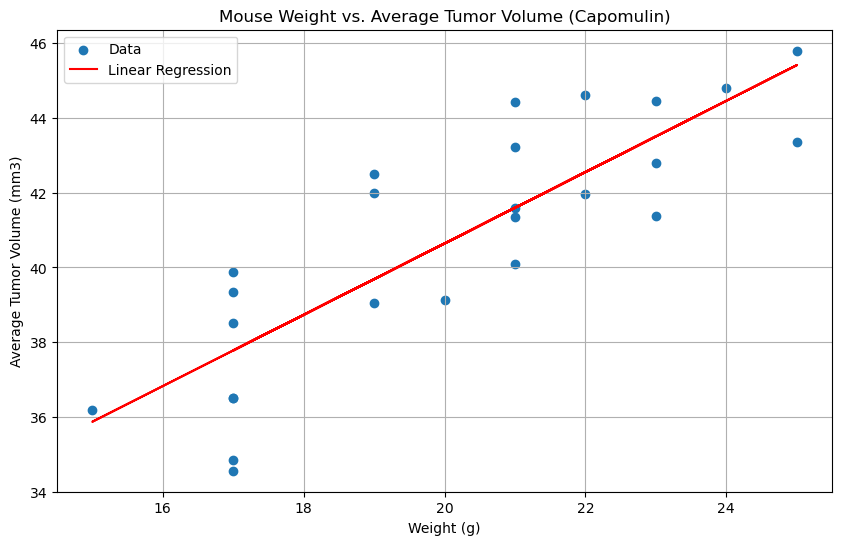

In [20]:
# Generate a scatter plot of mouse weight versus average observed tumor volume with regression line
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], label='Data')
plt.plot(average_tumor_volume['Weight (g)'], regression_values, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()
